In [1]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
    !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
    !git fetch --all
    !git reset --hard origin/master

In [2]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
#     !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
#     !git pull

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import importlib
import tradestats
import pandas as pd
from datetime import datetime
importlib.reload(tradestats)
from tradestats import *

In [5]:
prices = loaddata_1D('AUDUSD_Candlestick_1_D_BID_03.08.2003-24.10.2021.csv')
pricesASK = loaddata_1D('AUDUSD_Candlestick_1_D_ASK_03.08.2003-24.10.2021.csv')
prices['openASK'] = pricesASK.open
prices['highASK'] = pricesASK.high
prices['lowASK'] = pricesASK.low
prices['closeASK'] = pricesASK.close

In [6]:
len(prices)

4753

In [7]:
dictList = []
colFeat = []
keyList = []

maKey  = [3,5,7,30,35,40,45,60,80,100,120,140,160]
atrKey = [20]
# srsKey = [0]
rsiKey = [15]

maDict   = ma3(prices, maKey,3,5,7)
atrDict  = atr(prices, atrKey)
# srsDict  = srs(prices, srsKey)
rsiDict = rsi(prices,rsiKey)

dictList.append(maDict.df); colFeat.append('ma'); keyList.append(maKey) 
dictList.append(atrDict.df); colFeat.append('atr'); keyList.append(atrKey) 
# dictList.append(srsDict.df); colFeat.append('srs'); keyList.append(srsKey) 
dictList.append(rsiDict.df); colFeat.append('rsi'); keyList.append(rsiKey) 

tt = [1]
sl = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]
sl = [0.6,0.8]
tp = [0.7,0.75,0.8,0.85,0.9]
tp = [0.8,1]
tsl = [0,0.3,0.5,0.6]
tsl = [0,0.3]
atrperiod = 'atr20atr_prev'
savetrades = True

In [8]:
# prices.dropna(inplace=True)
masterFrame = pd.DataFrame(index=prices.index)
masterFrame[['id','year','month','day','date','weekday','open','high','low','close','openASK','highASK','lowASK','closeASK','volume']] = prices[['id','year','month','day','date','weekday','open','high','low','close','openASK','highASK','lowASK','closeASK','volume']]   

In [9]:
for i in range(0,len(dictList)):#iteracja po funkcjach
    for j in keyList[i]: #iteracja po okresach
        for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
            colID = colFeat[i] + str(j) + k
            masterFrame[colID] = dictList[i][j][k]

In [10]:
# masterFrame.to_csv(sep=';',path_or_buf='../Data/masterFrame.csv',date_format="%Y-%m-%d",index = False,na_rep='')

In [11]:
masterFrame = masterFrame.dropna()

In [12]:
starttime = datetime.now()
# alltrades = preparetrades_brut_tsl(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2015,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],2003,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[-1,1],[0.5],[0.9],2020,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.3,0.4,0.5,0.6,0.7,0.8,0.9],[0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[1,1.2,1.4,1.6,1.8,2,2.2],[1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2],2003,2021,atrperiod)
alltrades = preparetrades_brut_tsl(masterFrame,tt,sl,tp,tsl,2003,2021,atrperiod)
# alltrades = preparetrades_brut_tsl(masterFrame,[1],sl,tp,tsl,2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],2003,2021,atrperiod)
endtime = datetime.now()
print(str(endtime - starttime))

0.6 : 0.8 : 0 : -13  open: 1
0.6 : 0.8 : 0.3 : -15  open: 2
0.6 : 1 : 0 : -15  open: 1
0.6 : 1 : 0.3 : -17  open: 2
0.8 : 0.8 : 0 : -14  open: 1
0.8 : 0.8 : 0.3 : -15  open: 2
0.8 : 1 : 0 : -17  open: 1
0.8 : 1 : 0.3 : -18  open: 2
0:00:04.505864


In [13]:
trades = cleartrades_brut(alltrades.copy(),savetrades)

trades_len:  36736


In [14]:
def runstats(alltrades,ma1,atrperiod,sl,tp,tsl,ma2 = 5,fxs=[]):
    ma2=str(ma2)
    stats = runstats_ma(alltrades,'ma'+ma1+'SMAdiffseq_prev', 'ma'+ma1+'SMAvs'+ma2+'_prev', 'ma'+ma2+'SMAdiffseq_prev', 'rsi15rsidiffseq_prev', 'rsi15rsi_prev', atrperiod,sl,tp,tsl,'x1',fxs)

    return stats

def runstats_ma(alltrades,a,sv,aa,aaa,bbb,atr='atr140atr_prev',sl=[],tp=[],tsl=[],ff='',fxs=[]):
    conf   = {}
    params = {}
    
    params['tradetype'] = [2,[1]]
    params['sl'] =        [2,sl]
    params['tp'] =        [2,tp]
    params['tsl'] =       [2,tsl]
    params[atr]  =        [3,[-1000],[0.015]]
    params[a]    =        [1,[1,2,3,4]]
    params[sv]    =       [0,[-1000,0,1000],[-1000,0,1000]]
    params[aa]   =        [1,[1,2,3,4]]
    params[aaa]    =      [0,[-1000,0,1000],[-1000,0,1000]]
    params[bbb]    =      [0,[0,30,40,50,60,70],[30,40,50,60,70,100]]

    conf['filename'] =    'ma_48_2003_2021_1_'+atr+'_'+sv+ff
    if (fxs!=[]):
        conf['fxs'] = fxs
    print(conf['filename'])
    stats = stathyperparams2(alltrades,params,conf)
    return stats

In [15]:
def runstats(alltrades,ma1,atrperiod,sl,tp,tsl,ma2 = 5):
    ma2=str(ma2)
    stats = runstats_ma(alltrades,'ma'+ma1+'SMAdiffseq_prev', 'ma'+ma1+'SMAvs'+ma2+'_prev', 'ma'+ma2+'SMAdiffseq_prev', 'rsi15rsidiffseq_prev', 'rsi15rsi_prev', atrperiod,sl,tp,tsl,'x1')

    return stats

def runstats_ma(alltrades,a,sv,aa,aaa,bbb,atr='atr140atr_prev',sl=[],tp=[],tsl=[],ff=''):
    conf   = {}
    params = {}
    
    params['tradetype'] = [2,[1]]
    params['sl'] =        [2,sl]
    params['tp'] =        [2,tp]
    params['tsl'] =       [2,tsl]
    params[atr]  =        [3,[-1000],[0.015]]
    params[a]    =        [0,[1],[3]]
    params[sv]    =       [0,[-1000],[1000]]
    params[aa]   =        [0,[1],[5]]
    params[aaa]    =      [0,[-1000],[0]]
    params[bbb]    =      [0,[0],[60]]

    conf['filename'] =    'ma_48_2003_2021_1_'+atr+'_'+sv+ff
    print(conf['filename'])
    stats = stathyperparams2(alltrades,params,conf)
    return stats

In [16]:
importlib.reload(tradestats)
from tradestats import *
# runstats(alltrades,'30',atrperiod,sl,tp,tsl,3)
runstats(alltrades,'35',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'40',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'45',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'60',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'80',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'100',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'120',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'140',atrperiod,sl,tp,tsl,3)
# runstats(alltrades,'160',atrperiod,sl,tp,tsl,3)
    

# [3,5,7,30,35,40,45,60,80,100,120,140,160]


ma_48_2003_2021_1_atr20atr_prev_ma35SMAvs3_prevx1
allexecs:  8
finish:         2022-01-14 19:01:17.169553
duration:       0:00:00.173180


ii 0
           tradetype      1
                  sl    0.6
                  tp    0.8
                 tsl      0
       atr20atr_prev  -1000  0.015
 ma35SMAdiffseq_prev [1, 2]
     ma35SMAvs3_prev  -1000   1000
  ma3SMAdiffseq_prev [2, 3]
rsi15rsidiffseq_prev  -1000      0
       rsi15rsi_prev      0     60
{'ii': 0, 'c': 534, 'cu': 257, 'cd': 277, 'p_sm': 4645.832999999993, 'maxp': 4810.356999999995, 'maxd2': -500.99600000000146, 'mu': 0, 'md': 0, 'avgsl': 51.00718539325848, 'fx': '{}', 'r': 91.08193216663987, 'd': -9.822067148724052, 'rd2': 9.60158763742621}


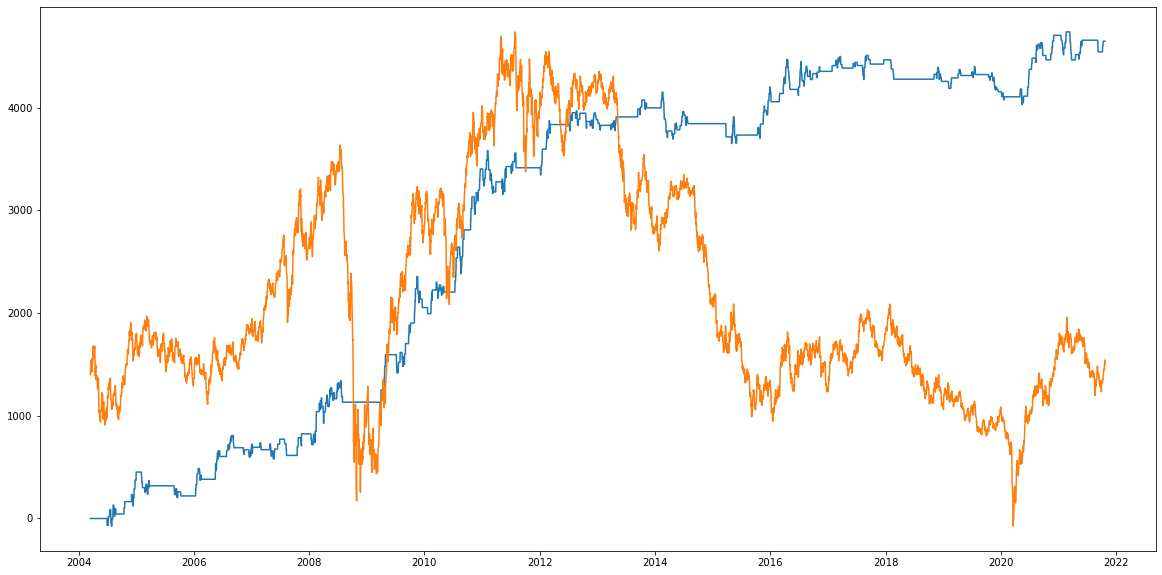

In [17]:
fxs = [
'{"tradetype": [2, 1], "sl": [2, 0.6], "tp": [2, 0.8], "tsl": [2, 0], "atr20atr_prev": [3, -1000, 0.015], "ma35SMAdiffseq_prev": [1, [1, 2]], "ma35SMAvs3_prev": [0, -1000, 1000], "ma3SMAdiffseq_prev": [1, [2, 3]], "rsi15rsidiffseq_prev": [0, -1000, 0], "rsi15rsi_prev": [0, 0, 60]}'
]    
sub = calcandplot(alltrades,fxs) 